In [1]:
import os
from plot import plot
import matplotlib.pyplot as plt
%matplotlib qt5
import numpy as np
import shelve

In [2]:
datadir = "data"
measurement = "noise_0.02"
measurement_nr = range(0, 1)

In [3]:
base_dirname = os.path.join(datadir, measurement)
base_filename = '%03d_%s.npy'

In [4]:
x, y, z, T, settings = [[] for _ in range(5)]
for i in measurement_nr:
    x.append(np.load(os.path.join(base_dirname, base_filename % (i, "x"))))
    y.append(np.load(os.path.join(base_dirname, base_filename % (i, "y"))))
    z.append(np.load(os.path.join(base_dirname, base_filename % (i, "z"))))
    T.append(np.load(os.path.join(base_dirname, base_filename % (i, "T"))))
    with shelve.open(os.path.join(base_dirname, '%03d_settings' % i)) as file:
        settings.append(file['settings'])

In [38]:
settings

[{'change_direction': False,
  'data_points': 50,
  'direction': ('r',),
  'extent': ((17.5, 19.5, 0.02), (10.0, 12, 0.02)),
  'logger_channel': 101,
  'mode': 'absolute',
  'sampling_time': 0.256,
  'sensors': ['1739']},
 {'change_direction': False,
  'data_points': 50,
  'direction': ('r',),
  'extent': ((17.5, 19.5, 0.02), (10.0, 12, 0.02)),
  'logger_channel': 101,
  'mode': 'absolute',
  'sampling_time': 0.256,
  'sensors': ['1739']}]

In [39]:
limits = [T[0].min(), T[0].max()]
for Ti in T:
    if Ti.min() < limits[0]:
        limits[0] = Ti.min()
    if Ti.max() > limits[1]:
        limits[1] = Ti.max()

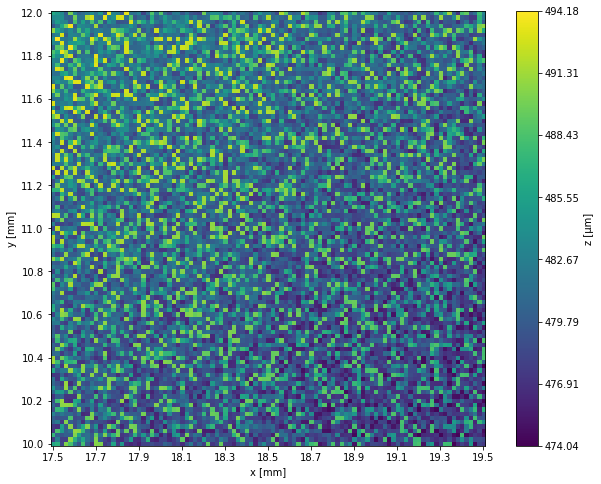

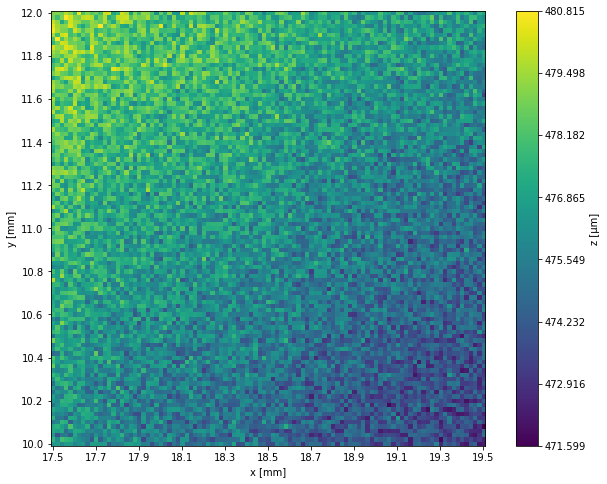

In [40]:
for xi, yi, zi in zip(x, y, z):
    plot(xi, yi, zi, "z")

In [5]:
for xi, yi, zi in zip(x, y, z):
    plot(xi, yi, zi, "z")

In [7]:
T_flat = []
for Ti in T:
    T_flat.append(Ti.flatten())
T_flat = np.concatenate(T_flat)

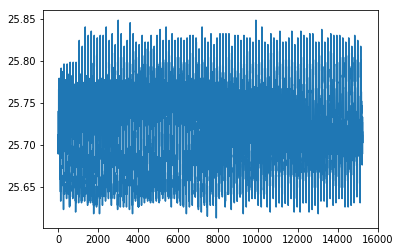

In [8]:
plt.plot(T_flat)